In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Data import

In [ ]:
final_data = pd.read_csv('/content/drive/MyDrive/DHS/Diabetes/Data/India/final_data.csv')

In [ ]:
final_data['final_diabetes'].value_counts()

0    712482
1     24958
Name: final_diabetes, dtype: int64

#shb70 - gluecose miss or 995-998 remove

In [ ]:
final_data = final_data.loc[final_data['shb70'] <995]

In [ ]:
final_data['final_diabetes'].value_counts()

0    712482
1      9720
Name: final_diabetes, dtype: int64

In [ ]:
#final_data.loc[(pd.notna(final_data['ha40'])) & (pd.notna(final_data['hb40']))]

In [ ]:
final_data.head(3)

,hv005,hv021,hv023,hv105,hv115,hv104,hv106,hml18,shb70,ha40,...,hc56,hv026,hv219,ha57,hb60,shb51,shb52,hv109,hv116,final_diabetes
0,191072,10001,64010,46,1.0,2,0,0.0,116.0,2295.0,...,NaN,NaN,1,2.0,NaN,2.0,13.0,0,1.0,0
1,191072,10001,64010,20,0.0,2,3,0.0,83.0,2203.0,...,NaN,NaN,1,3.0,NaN,2.0,13.0,5,0.0,0
2,191072,10001,64010,40,1.0,2,1,0.0,278.0,2611.0,...,NaN,NaN,2,3.0,NaN,1.0,8.0,2,1.0,1


## Count nan

In [ ]:
nan_counts = {}
non_nan_counts = {}
# Iterate through columns and calculate the sum of NaN values for each column
for column in final_data.columns:
    nan_count = final_data[column].isnull().sum()
    non_nan_count = len(final_data) - nan_count
    nan_counts[column] = nan_count
    non_nan_counts[column] = non_nan_count
# Print column names and their corresponding NaN counts
for column, nan_count in nan_counts.items():
    non_nan_count = non_nan_counts[column]
    print(f"Column '{column}' has {nan_count} NaN values and {non_nan_count} non-NaN values.")

Column 'hv005' has 0 NaN values and 722202 non-NaN values.
Column 'hv021' has 0 NaN values and 722202 non-NaN values.
Column 'hv023' has 0 NaN values and 722202 non-NaN values.
Column 'hv105' has 0 NaN values and 722202 non-NaN values.
Column 'hv115' has 0 NaN values and 722202 non-NaN values.
Column 'hv104' has 0 NaN values and 722202 non-NaN values.
Column 'hv106' has 0 NaN values and 722202 non-NaN values.
Column 'hml18' has 99703 NaN values and 622499 non-NaN values.
Column 'shb70' has 0 NaN values and 722202 non-NaN values.
Column 'ha40' has 100407 NaN values and 621795 non-NaN values.
Column 'ha53' has 99683 NaN values and 622519 non-NaN values.
Column 'ha55' has 99683 NaN values and 622519 non-NaN values.
Column 'shb13' has 602 NaN values and 721600 non-NaN values.
Column 'hv206' has 0 NaN values and 722202 non-NaN values.
Column 'ha60' has 722202 NaN values and 0 non-NaN values.
Column 'hc27' has 722202 NaN values and 0 non-NaN values.
Column 'hb35' has 622950 NaN values and 99

##col :
* 'hv005','hv021','hv023','hv105','hv115','hv104','hv106','hml18','shb70','ha40','ha53','ha55','shb13','hv206','ha60','hc27','hb35','shdistri','hv025','hb40','hv252','shb16s','shb23s','shb16d','shb23d','shb27d','hv270','shb19','hv024','hc53','hc55','hc56','hv026','hv219','ha57','hb60','shb51','shb52','hv109','hv116'

#EDA  - Dropped Columns
**observation :**
* hc27 = sex
* ha60 = marital
* hc53 -Hemoglobin level
* hc55 -Result of measurement - hemoglobin
* hc56 -Hemoglobin level adjusted for altitude
* hv026 -NA - Place of residence
* hb60 - Marital status
* ha55 - Result of measurement
* shb19 - Currently taking a prescribed medicine to lower for bp

##hv005 - Household sample weight

In [ ]:
final_data[['hv005']].value_counts()

hv005  
536179     450
1544581    392
71347      381
218324     375
160012     359
          ... 
568815       2
527594       2
130338       1
2268755      1
2412787      1
Length: 27417, dtype: int64

##hv021 - Primary sampling unit

In [ ]:
final_data[['hv021']].value_counts()

hv021 
335129    76
140899    65
70119     62
190053    61
290585    60
          ..
240529     2
350587     2
250107     1
250264     1
240059     1
Length: 28510, dtype: int64

##hv023 - Stratification used in sample design

In [ ]:
final_data[['hv023']].value_counts()

hv023
14710    1367
43510    1354
44910    1338
14310    1331
15010    1290
         ... 
972        23
57222      20
32410      20
57223      20
912        18
Length: 2514, dtype: int64

##hv105 - Age of household members


In [ ]:
final_data[['hv105']].value_counts()

hv105
30       36571
25       34915
35       34110
18       32677
20       32379
40       31473
22       30902
28       29117
45       29036
23       26426
24       25903
32       25637
26       25309
19       24528
21       24291
27       23298
38       22272
42       19245
29       18346
36       17960
48       17061
33       16926
34       16483
37       15854
31       15351
39       13884
43       13545
46       13027
47       12748
44       11723
41       11624
49       11120
50        2807
52        1817
53        1338
51        1297
54        1202
dtype: int64

##hv115 - Current marital status
* 0 - Never married , 1 - Married , 2 - Living together , 3 - Widowed , 4 = Divorced
* 5 - Not living together #8  Don't know

In [ ]:
final_data[['hv115']].value_counts()

hv115
1.0      567006
0.0      126277
3.0       20694
5.0        4967
4.0        3221
8.0          37
dtype: int64

##hv104 - Sex of household member
* 1 - Male & 2 - Female

In [ ]:
final_data[['hv104']].value_counts()

hv104
2        622523
1         99679
dtype: int64

## hv106 - Highest educational level attained :
* 0  - No education, preschool , 1 - Primary , 2 - Secondary , 3 - Higher , 8 - Don't know

In [ ]:
final_data[['hv106']].value_counts()

hv106
2        324512
0        198385
1        102519
3         95301
8          1485
dtype: int64

##hml18 - Pregnancy status from Individual file
* 0 -  (Not pregnant, don't know)  
* 1 - Pregnant
* 3 - missing

In [ ]:
final_data[['hml18']].value_counts()

hml18
0.0      590571
1.0       31928
dtype: int64

###Column 'hml18' has 99703 NaN values and 622499 non-NaN values.
**where**
* 0 - 590571
* 1 - 31928
* 3 - 99703

In [ ]:
final_data['hml18'] = final_data['hml18'].fillna(3)

In [ ]:
final_data[['hml18']].value_counts()

hml18
0.0      590571
3.0       99703
1.0       31928
dtype: int64

##shb70 - Glucose level
* 20:498 - Glucose level (mg/dL)       , 499  -    499 (mg/dL) +

In [ ]:
final_data['shb70'].value_counts()

98.0     20708
99.0     16932
100.0    16721
96.0     16685
102.0    16372
         ...  
494.0        3
462.0        3
457.0        3
482.0        2
497.0        2
Name: shb70, Length: 480, dtype: int64

###checking outlier of glucose level

<ipython-input-19-31ba18314938>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=final_data['shb70'], shade=True, color="skyblue")


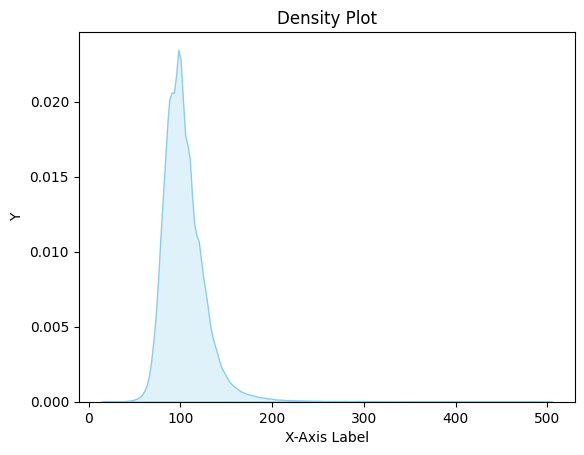

In [ ]:
# Create a density plot
sns.kdeplot(data=final_data['shb70'], shade=True, color="skyblue")
plt.title("Density Plot")
plt.xlabel("X-Axis Label")
plt.ylabel("Y")
plt.show()

##ha40 - Body Mass Index -
* 1200:6000  ,9998  -   Flagged cases

In [ ]:
final_data[['ha40']].value_counts()

ha40  
1956.0    780
2058.0    779
2137.0    773
2081.0    770
2126.0    764
         ... 
4493.0      1
4488.0      1
4487.0      1
4483.0      1
1201.0      1
Length: 3511, dtype: int64

###Column 'ha40' has 100407 NaN values and 621795 non-NaN values.
* Flaged cases - 1626
* Missing value - 2226

In [ ]:
final_data[['ha40']].describe()

,ha40
count,621795.000000
mean,2206.783765
std,482.292170
min,1201.000000
25%,1906.000000
50%,2137.000000
75%,2418.000000
max,9998.000000


In [ ]:
#final_data['ha40'] = final_data['ha40'].fillna(2206.78)

In [ ]:
final_data['ha40'].value_counts()

1956.0    780
2058.0    779
2137.0    773
2081.0    770
2126.0    764
         ... 
4702.0      1
5590.0      1
4580.0      1
4130.0      1
5123.0      1
Name: ha40, Length: 3511, dtype: int64

<ipython-input-24-ae8a790e8fe9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=final_data['ha40'], shade=True, color="skyblue")


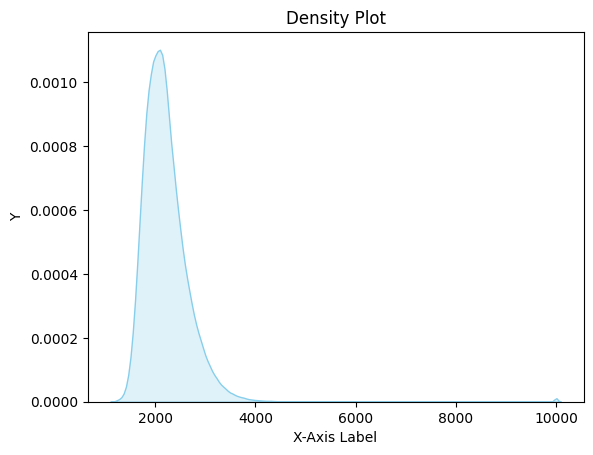

In [ ]:
# Create a density plot
sns.kdeplot(data=final_data['ha40'], shade=True, color="skyblue")
plt.title("Density Plot")
plt.xlabel("X-Axis Label")
plt.ylabel("Y")
plt.show()

##ha53 - Hemoglobin level (g/dl - 1 decimal)
* 20:900  ,  994  -  Not present ,  995  -   Refused , 996   -  Other , 998   -  Not tested
* Column 'ha53' has 99683 NaN values and 622519 non-NaN values.

In [ ]:
final_data[['ha53']].value_counts()

ha53 
123.0    18532
121.0    18453
122.0    18020
124.0    17577
112.0    17400
         ...  
205.0        1
232.0        1
254.0        1
204.0        1
201.0        1
Length: 210, dtype: int64

<ipython-input-26-1d375b43af72>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=final_data['ha53'], shade=True, color="skyblue")


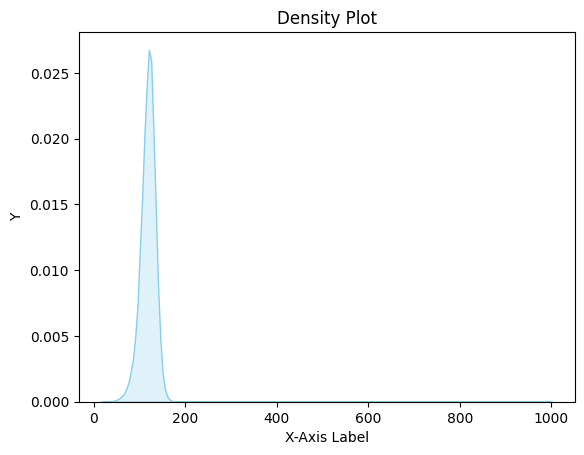

In [ ]:
# Create a density plot
sns.kdeplot(data=final_data['ha53'], shade=True, color="skyblue")
plt.title("Density Plot")
plt.xlabel("X-Axis Label")
plt.ylabel("Y")
plt.show()


* here mode is 0 ,so we fill nan with 0

In [ ]:
final_data['ha53'] = final_data['ha53'].fillna(0)

In [ ]:
len(final_data['ha53'].isnull())

722202

##shb13 - Arm circumference
* 5:80  Arm circumference (cm) &  99 -  Missing

In [ ]:
final_data[['shb13']].value_counts()

shb13
24.0     112169
26.0      89511
23.0      89473
25.0      82285
28.0      59119
          ...  
59.0          1
58.0          1
55.0          1
54.0          1
57.0          1
Length: 65, dtype: int64

In [ ]:
final_data[['shb13']].describe()

,shb13
count,721600.000000
mean,25.365455
std,3.274955
min,5.000000
25%,23.000000
50%,25.000000
75%,27.000000
max,80.000000


<ipython-input-31-1d375b43af72>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=final_data['ha53'], shade=True, color="skyblue")


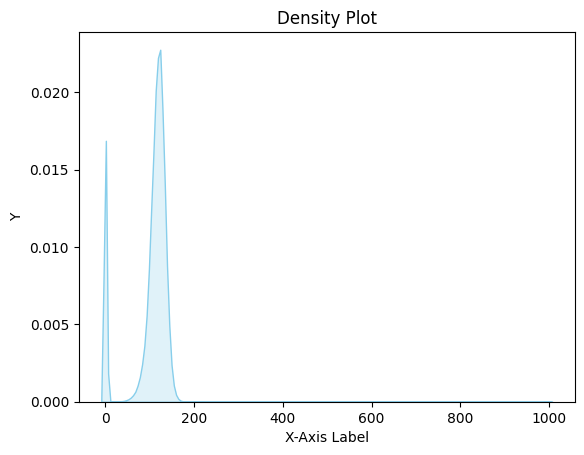

In [ ]:
# Create a density plot
sns.kdeplot(data=final_data['ha53'], shade=True, color="skyblue")
plt.title("Density Plot")
plt.xlabel("X-Axis Label")
plt.ylabel("Y")
plt.show()

In [ ]:
final_data['shb13'] = final_data['shb13'].fillna(25.36)

In [ ]:
final_data['shb13'].max()

80.0

##hv206 - Has electricity
* 0 - No & 1 - Yes

In [ ]:
final_data[['hv206']].value_counts()

hv206
1        647312
0         74890
dtype: int64

##hb35 - Smoking (cigarettes in last 24 hours)
* 0  -   Doesn't smoke,  1:79  , 80  -  80+
* 94    Smokes pipes, cigars, etc
* 98    Don't know

In [ ]:
final_data[['hb35']].value_counts()

hb35
0.0     84430
2.0      2896
1.0      2209
3.0      1637
5.0      1504
4.0      1485
10.0     1348
6.0       625
12.0      428
94.0      408
98.0      403
20.0      358
8.0       340
15.0      336
7.0       289
9.0        71
30.0       65
25.0       59
11.0       57
13.0       56
14.0       45
24.0       38
16.0       25
18.0       22
40.0       18
22.0       14
17.0       13
21.0       10
35.0        9
23.0        9
19.0        6
80.0        6
50.0        6
26.0        5
28.0        4
45.0        4
55.0        2
60.0        2
29.0        2
36.0        1
42.0        1
32.0        1
27.0        1
70.0        1
77.0        1
34.0        1
33.0        1
dtype: int64

###Column 'hb35' has 622950 NaN values and 99252 non-NaN values.

In [ ]:
final_data[['hb35']].max()

hb35    98.0
dtype: float64

In [ ]:
final_data['hb35'].fillna(0, inplace=True)
final_data['hb35'] = final_data['hb35'].replace(98, 0)

In [ ]:
final_data[['hb35']].value_counts()

hb35
0.0     707783
2.0       2896
1.0       2209
3.0       1637
5.0       1504
4.0       1485
10.0      1348
6.0        625
12.0       428
94.0       408
20.0       358
8.0        340
15.0       336
7.0        289
9.0         71
30.0        65
25.0        59
11.0        57
13.0        56
14.0        45
24.0        38
16.0        25
18.0        22
40.0        18
22.0        14
17.0        13
21.0        10
35.0         9
23.0         9
80.0         6
50.0         6
19.0         6
26.0         5
28.0         4
45.0         4
60.0         2
55.0         2
29.0         2
27.0         1
36.0         1
34.0         1
33.0         1
70.0         1
77.0         1
32.0         1
42.0         1
dtype: int64

##shdistri - District
* every number is distric name
*Column 'shdistri' has 0 NaN values and 722202 non-NaN values.


In [ ]:
final_data[['shdistri']].value_counts()

shdistri
138         3438
435         2644
449         2577
132         2569
439         2567
            ... 
91           512
95           500
90           488
98           465
94           416
Length: 640, dtype: int64

##hb40                   Body Mass Index
* 1000:6000 , 9998   -    Flagged cases , 9999   -    Missing
*  Column 'hb40' has 622698 NaN values and 99504 non-NaN values.


In [ ]:
final_data[['hb40']].describe()

,hb40
count,99504.000000
mean,2218.018612
std,449.058403
min,1219.000000
25%,1944.000000
50%,2171.000000
75%,2422.000000
max,9998.000000


In [ ]:
final_data['hb40'].isnull().sum()

622698

In [ ]:
#final_data['hb40'].fillna(2171, inplace=True)
final_data['hb40'] = final_data['hb40'].replace(9999, 2171)

In [ ]:
#final_data.hb40 = np.where(final_data.hb40 > 9998 , 2171 ,final_data.hb40)

In [ ]:
final_data['hb40'].isnull().sum()

622698

##hv025 - Type of place of residence  
* 1  - Urban & 2 -  Rural
*  Column 'hv025' has 0 NaN values and 722202 non-NaN values.

In [ ]:
final_data[['hv025']].value_counts()

hv025
2        509537
1        212665
dtype: int64

##hv252 - Frequency household members smoke inside the home
* 0 - Never,  1 - Daily, 2 - Weekly, 3 - Monthly , 4 - Less than monthly, 9  -Missing
* Column 'hv252' has 0 NaN values and 722202 non-NaN values.

In [ ]:
final_data[['hv252']].value_counts()

hv252
0        377058
1        232306
2         64686
3         24254
4         23898
dtype: int64

#avg_sys - average SYSTOLIC

##shb16s - First SYSTOLIC reading
*  0:990 - Systolic reading , 994  -  Refused, 995  -  Technical problem, 996  -  Other , 999  -  Missing
* Column 'shb16s' has 571 NaN values and 721631 non-NaN values.
* Only change the 1st sistolic nan value and > 990 with mean.


In [ ]:
final_data[['shb16s']].describe()

,shb16s
count,721631.000000
mean,119.163597
std,18.737150
min,0.000000
25%,109.000000
50%,118.000000
75%,127.000000
max,996.000000


In [ ]:
final_data['shb16s'].fillna(119.16, inplace=True)
final_data['shb16s'] = final_data['shb16s'].replace(0, 119.16)

In [ ]:
#replacing  Replace >=990 with 119.16
final_data.shb16s = np.where(final_data.shb16s > 990 , 119.16 ,final_data.shb16s)

In [ ]:
len(final_data.loc[final_data['shb16s']> 990])

0

<ipython-input-51-ae8a790e8fe9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=final_data['ha40'], shade=True, color="skyblue")


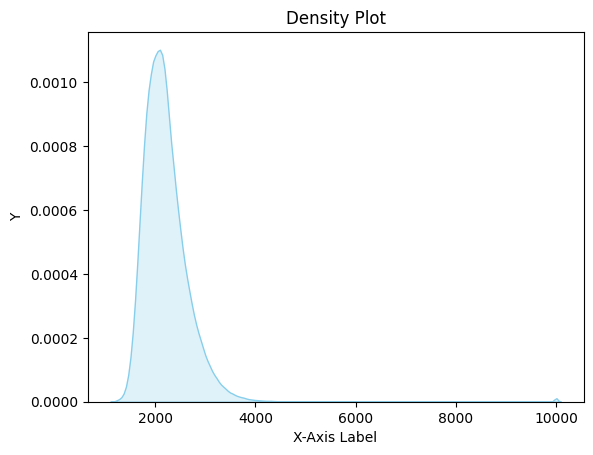

In [ ]:
# Create a density plot
sns.kdeplot(data=final_data['ha40'], shade=True, color="skyblue")
plt.title("Density Plot")
plt.xlabel("X-Axis Label")
plt.ylabel("Y")
plt.show()

##shb23s - Second SYSTOLIC reading
*  0:990 - Systolic reading , 994  -  Refused, 995  -  Technical problem, 996  -  Other , 999  -  Missing
* Column 'shb23s' has 10641 NaN values and 711561 non-NaN values.


In [ ]:
final_data[['shb23s']].describe()

,shb23s
count,711561.000000
mean,116.510586
std,18.483109
min,1.000000
25%,107.000000
50%,115.000000
75%,124.000000
max,996.000000


In [ ]:
final_data['shb23s'].fillna(115, inplace=True)
final_data['shb23s'] = final_data['shb23s'].replace(0, 115)

In [ ]:
#replacing  Replace >=990 with 115
final_data.shb23s = np.where(final_data.shb23s > 990 , 115 ,final_data.shb23s)

In [ ]:
len(final_data.loc[final_data['shb23s']>990])

0

##shb27s - Third SYSTOLIC reading
* Column 'shb27s' has 27136 NaN values and 695066 non-NaN values.


In [ ]:
final_data[['shb27s']].describe()

,shb27s
count,695066.000000
mean,114.855234
std,18.707494
min,0.000000
25%,105.000000
50%,113.000000
75%,122.000000
max,996.000000


In [ ]:
final_data['shb27s'].fillna(113, inplace=True)
final_data['shb27s'] = final_data['shb27s'].replace(0, 113)

In [ ]:
#replacing  Replace >=990 with 113
final_data.shb27s = np.where(final_data.shb27s > 990 , 113 ,final_data.shb27s)

In [ ]:
len(final_data.loc[final_data['shb27s']>990])

0

### 3 col avg_sys
* here we take a new col name 'avg_sys' ,where we contain 1st,2nd,3rd systolic reading avg.

In [ ]:
final_data['avg_sys'] = final_data[['shb16s', 'shb23s', 'shb27s']].mean(axis=1)

In [ ]:
final_data[['avg_sys']].value_counts()

avg_sys   
115.000000    8299
116.000000    8207
114.666667    8106
115.333333    7972
113.333333    7965
              ... 
304.000000       1
304.666667       1
305.666667       1
306.666667       1
687.666667       1
Length: 664, dtype: int64

In [ ]:
final_data[['avg_sys']].describe()

,avg_sys
count,722202.000000
mean,116.749155
std,14.860644
min,47.666667
25%,107.333333
50%,115.333333
75%,124.000000
max,687.666667


#avg_dia - Average DIASTOLIC

##shb16d - First DIASTOLIC reading
*  0:990 - Systolic reading , 994  -  Refused, 995  -  Technical problem, 996  -  Other , 999  -  Missing
* Column 'shb16d' has 683 NaN values and 721519 non-NaN values.

In [ ]:
final_data[['shb16d']].describe()

,shb16d
count,721519.000000
mean,79.778343
std,11.415743
min,0.000000
25%,73.000000
50%,79.000000
75%,86.000000
max,995.000000


In [ ]:
final_data['shb16d'].fillna(79.77, inplace=True)
final_data['shb16d'] = final_data['shb16d'].replace(0, 79.77)

In [ ]:
#replacing  Replace >=990 with 79.77
final_data.shb16d = np.where(final_data.shb16d > 990 , 79.77 ,final_data.shb16d)

In [ ]:
len(final_data.loc[final_data['shb16d']> 990])

0

<ipython-input-67-e74e17f0efdc>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=final_data['shb16d'], shade=True, color="skyblue")


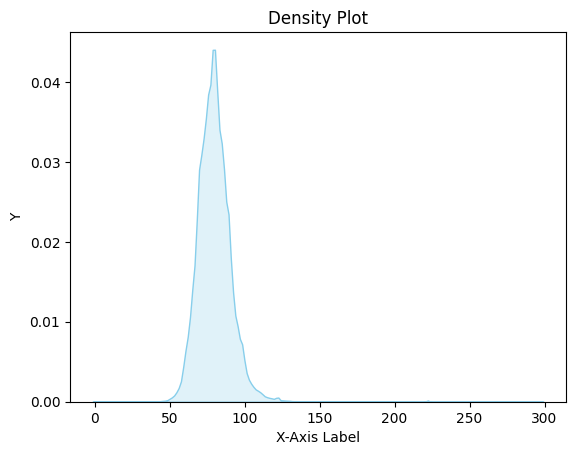

In [ ]:
# Create a density plot
sns.kdeplot(data=final_data['shb16d'], shade=True, color="skyblue")
plt.title("Density Plot")
plt.xlabel("X-Axis Label")
plt.ylabel("Y")
plt.show()

##shb23d - Second DIASTOLIC reading
*  0:990 - Systolic reading , 994  -  Refused, 995  -  Technical problem, 996  -  Other , 999  -  Missing
*  Column 'shb23d' has 10672 NaN values and 711530 non-NaN values.


In [ ]:
final_data[['shb23d']].describe()

,shb23d
count,711530.000000
mean,78.927521
std,28.866424
min,0.000000
25%,71.000000
50%,78.000000
75%,84.000000
max,994.000000


In [ ]:
final_data['shb23d'].fillna(78, inplace=True)
final_data['shb23d'] = final_data['shb23d'].replace(0, 78)

In [ ]:
#replacing  Replace >=990 with 78
final_data.shb23d = np.where(final_data.shb23d > 990 , 78 ,final_data.shb23d)

In [ ]:
len(final_data.loc[final_data['shb23d']> 990])

0

##shb27d Third DIASTOLIC reading
*  0:990 - Systolic reading , 994  -  Refused, 995  -  Technical problem, 996  -  Other , 999  -  Missing
* Column 'shb27d' has 27166 NaN values and 695036 non-NaN values.

In [ ]:
final_data[['shb27d']].describe()

,shb27d
count,695036.000000
mean,78.221925
std,33.419622
min,1.000000
25%,70.000000
50%,76.000000
75%,82.000000
max,996.000000


In [ ]:
final_data['shb27d'].fillna(76, inplace=True)
final_data['shb27d'] = final_data['shb27d'].replace(0, 76)

In [ ]:
#replacing  Replace >=990 with 76
final_data.shb27d = np.where(final_data.shb27d > 990 , 76 ,final_data.shb27d)

In [ ]:
len(final_data.loc[final_data['shb27d']> 990])

0

### 3 col avr_dia  

In [ ]:
final_data['avg_dia'] = final_data[['shb16d','shb23d','shb27d']].mean(axis=1)

In [ ]:
final_data[['avg_dia']].describe()

,avg_dia
count,722202.000000
mean,78.942136
std,16.955157
min,22.333333
25%,72.000000
50%,77.666667
75%,83.666667
max,680.000000


##hv270 - Wealth index                                    
* 1 -  Poorest,  2 - Poorer, 3  - Middle, 4 - Richer, 5 - Richest
* Column 'hv270' has 0 NaN values and 722202 non-NaN values.


In [ ]:
final_data[['hv270']].value_counts()

hv270
3        152546
2        152306
4        145060
5        138907
1        133383
dtype: int64

##hv219 - Sex of head of household
* 1 - Male & 2 -  Female
* Column 'hv219' has 0 NaN values and 722202 non-NaN values.


In [ ]:
final_data[['hv219']].value_counts()

hv219
1        629270
2         92932
dtype: int64

##ha57 - Anemia level                                    
* 1 - Severe,  2 - Moderate, 3 - Mild , 4 - Not anemic
*  Column 'ha57' has 99749 NaN values and 622453 non-NaN values.

In [ ]:
final_data[['ha57']].value_counts()

ha57
4.0     302702
3.0     237953
2.0      75458
1.0       6340
dtype: int64

In [ ]:
final_data['ha57']= final_data['ha57'].fillna(4)

In [ ]:
final_data[['ha57']].value_counts()

ha57
4.0     402451
3.0     237953
2.0      75458
1.0       6340
dtype: int64

## shb51 - Time since last ate
*  0:48  Hours ago , 99    Missing
* Column 'shb51' has 2048 NaN values and 720154 non-NaN values.

In [ ]:
final_data[['shb51']].describe()

,shb51
count,720154.000000
mean,3.148896
std,3.571339
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,48.000000


In [ ]:
final_data['shb51']= final_data['shb51'].fillna(3)

In [ ]:
final_data[['shb51']].isnull().sum()

shb51    0
dtype: int64

##shb52 - Time since last drank, something other than pla
* 0:94 - Hours ago , 95  -  95+ hours ago
* 99    Missing
*
Column 'shb52' has 6144 NaN values and 716058 non-NaN values.

In [ ]:
final_data[['shb52']].describe()

,shb52
count,716058.000000
mean,5.266001
std,13.789749
min,0.000000
25%,0.000000
50%,2.000000
75%,5.000000
max,95.000000


In [ ]:
final_data['shb52']= final_data['shb52'].fillna(5)

In [ ]:
final_data[['shb52']].shape

(722202, 1)

## hv024 - State
* Column 'hv024' has 0 NaN values and 722202 non-NaN values.

In [ ]:
final_data[['hv024']].value_counts()

hv024
33       97672
19       65611
5        44799
29       43360
26       34347
31       31138
20       30664
15       29370
4        29002
16       27368
14       26622
7        26237
11       25629
12       22956
28       20871
35       18140
34       17016
3        14620
21       14136
23       12661
17       11966
13       11237
24       10749
2        10279
22        8928
36        7536
30        5583
32        5055
25        4746
27        4271
1         3017
10        2326
9         1566
18        1131
8          895
6          698
dtype: int64

##hv109 - Educational attainment                           
* 0  - No education,  1  - Incomplete primary,  2 -  Complete primary
* 3 - Incomplete secondary , 4 -  Complete secondary , 5  - Higher,  8 - Don't know
* Column 'hv109' has 0 NaN values and 722202 non-NaN values.

In [ ]:
final_data[['hv109']].value_counts()

hv109
3        256164
0        198385
5         95301
4         68348
2         52979
1         49540
8          1485
dtype: int64

In [ ]:
final_data['hv109']= final_data['hv109'].replace(8,0)

In [ ]:
final_data[['hv109']].value_counts()

hv109
3        256164
0        199870
5         95301
4         68348
2         52979
1         49540
dtype: int64

##hv116 - Currently, formerly, never married  
* 0 - Never married , 1  -  Currently married , 2  - Formerly/ever married , 9 -   Missing
* Column 'hv116' has 37 NaN values and 722165 non-NaN values.

In [ ]:
final_data[['hv116']].describe()

,hv116
count,722165.000000
mean,0.865135
std,0.443468
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
final_data['hv116'] = final_data['hv116'].fillna(1)

In [ ]:
final_data['hv116'].isnull().sum()

0

In [ ]:
final_data['hv116']

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
737434    1.0
737435    0.0
737437    1.0
737438    1.0
737439    0.0
Name: hv116, Length: 722202, dtype: float64

#ha40 & hb40  = bmi

In [ ]:
final_data['bmi']= final_data[['ha40','hb40']].sum(axis=1)

In [ ]:
final_data['bmi'].describe()

count    722202.000000
mean       2205.572451
std         483.895671
min           0.000000
25%        1910.000000
50%        2141.000000
75%        2418.000000
max        9998.000000
Name: bmi, dtype: float64

In [ ]:
final_data['bmi'] = final_data['bmi'].replace(0, 2172)

In [ ]:
final_data['bmi'].isnull().sum()

0

In [ ]:
final_data['final_diabetes'].value_counts()

0    712482
1      9720
Name: final_diabetes, dtype: int64

#SAVE DATA

In [ ]:
ind_clean_data = final_data[['hv005','hv021','hv023','hv105','hv115','hv104','hv106','hml18','shb70','ha40',
                        'ha53','shb13','hv206','hb35','shdistri','hv025','hb40','hv252','hv270','hv024',
                      'hv21  9','ha57','shb51','shb52','hv109','hv116','avg_sys','avg_dia','bmi','final_diabetes']]

In [ ]:
ind_clean_data.to_csv('/content/drive/MyDrive/DHS/Diabetes/Data/India/india_clean_file.csv', index=False)

In [ ]:
ind_clean_data.isnull().sum()

hv005                  0
hv021                  0
hv023                  0
hv105                  0
hv115                  0
hv104                  0
hv106                  0
hml18                  0
shb70                  0
ha40              100407
ha53                   0
shb13                  0
hv206                  0
hb35                   0
shdistri               0
hv025                  0
hb40              622698
hv252                  0
hv270                  0
hv024                  0
hv219                  0
ha57                   0
shb51                  0
shb52                  0
hv109                  0
hv116                  0
avg_sys                0
avg_dia                0
bmi                    0
final_diabetes         0
dtype: int64